1.删除重复数据，并输出去重前后的数据量

In [1]:
import pandas as pd
# 读取 CSV 文件
file_path = '/Users/yingnizhen/Desktop/github_bot_raw_data.csv' 
df = pd.read_csv(file_path)

# 输出去重前的数据量
print(f"去重前的数据量: {len(df)}")

# 删除重复的数据
df_dropped = df.drop_duplicates()

# 输出去重后的数据量
print(f"去重后的数据量: {len(df_dropped)}")

# 如果需要将去重后的数据保存为新的 CSV 文件
df_dropped.to_csv('去重后的文件.csv', index=False)


去重前的数据量: 20358
去重后的数据量: 19779


2. 缺失值处理
首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
最后，再次看各列有无缺失值

In [3]:
import pandas as pd

# 读取 CSV 文件
file_path = '/Users/yingnizhen/Desktop/github_bot_raw_data.csv'  # 修改为你的文件路径
df = pd.read_csv(file_path)

# 1. 去掉 gravatar_id 列
df = df.drop(columns=['gravatar_id'], errors='ignore')  # 使用 errors='ignore' 防止列不存在时报错

# 2. 查看去除 gravatar_id 列后的缺失值情况
print("去掉 gravatar_id 列前各列缺失值情况：")
print(df.isnull().sum())

# 3. 将可转化为布尔类型的列转化为布尔类型
# 假设 "company" 和 "location" 是可转化为布尔值的列（如果你有其他列需要转换，请自行添加）
boolean_columns = ['company', 'location']  # 修改为你实际需要转换的列
for column in boolean_columns:
    df[column] = df[column].apply(lambda x: True if pd.notnull(x) else False)

# 4. 填充文本数据的缺失值为空字符串
text_columns = text_columns = ['name', 'blog', 'bio', 'twitter_username', 'email'] 
for column in text_columns:
    df[column] = df[column].fillna('')

# 5. 再次查看各列缺失值情况
print("\n去重后各列缺失值情况:")
print(df.isnull().sum())

# 将处理后的数据保存为新的 CSV 文件
df.to_csv('处理后的文件.csv', index=False)


去掉 gravatar_id 列前各列缺失值情况：
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2654
company                 9229
blog                   11601
location                7287
email                  12079
hireable               16956
bio                    11262
twitter_username       15297
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64

去重后

3.数据变换，将created_at、updated_at转为时间戳

In [4]:
import pandas as pd

# 读取 CSV 文件
file_path = '/Users/yingnizhen/Desktop/github_bot_raw_data.csv' 
df = pd.read_csv(file_path)

# 1. 去掉 gravatar_id 列
df = df.drop(columns=['gravatar_id'], errors='ignore')

# 2. 将可转化为布尔类型的列转化为布尔类型
boolean_columns = ['company', 'location', 'hireable', 'site_admin']
for column in boolean_columns:
    if column in df.columns:
        df[column] = df[column].apply(lambda x: True if pd.notnull(x) else False)

# 3. 填充文本数据的缺失值为空字符串
text_columns = ['name', 'blog', 'bio', 'twitter_username', 'email']
for column in text_columns:
    if column in df.columns:
        df[column] = df[column].fillna('')

# 4. 转换 created_at 和 updated_at 列为时间戳格式
date_columns = ['created_at', 'updated_at']
for column in date_columns:
    if column in df.columns:
        df[column] = pd.to_datetime(df[column], errors='coerce')  # 转换为日期时间格式
        df[column] = df[column].astype('int64') // 10**9  # 转换为时间戳（秒）

# 5. 查看处理后数据的缺失值情况
print("处理缺失值后的各列缺失值情况：")
print(df.isnull().sum())

# 如果需要将处理后的数据保存为新的 CSV 文件
df.to_csv('处理后的文件.csv', index=False)


处理缺失值后的各列缺失值情况：
actor_id               0
label                  0
login                  0
id                     0
node_id                0
avatar_url             0
url                    0
html_url               0
followers_url          0
following_url          0
gists_url              0
starred_url            0
subscriptions_url      0
organizations_url      0
repos_url              0
events_url             0
received_events_url    0
type                   0
site_admin             0
name                   0
company                0
blog                   0
location               0
email                  0
hireable               0
bio                    0
twitter_username       0
public_repos           0
public_gists           0
followers              0
following              0
created_at             0
updated_at             0
dtype: int64


4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

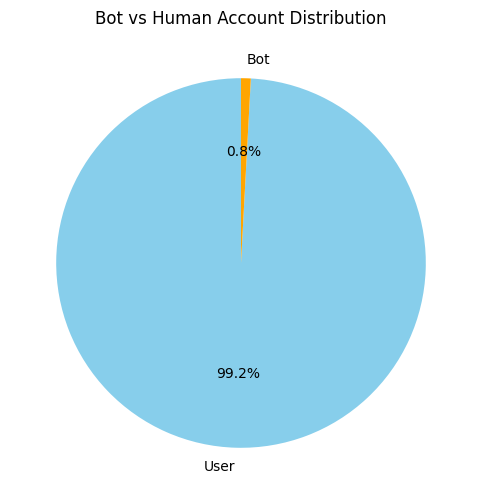

In [6]:
import matplotlib.pyplot as plt
# 计算类型分布
type_counts = df['type'].value_counts()

# 绘制饼图
plt.figure(figsize=(8, 6))
type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Bot vs Human Account Distribution')
plt.ylabel('')
plt.show()


原因：饼图适合展示分类数据的比例

4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

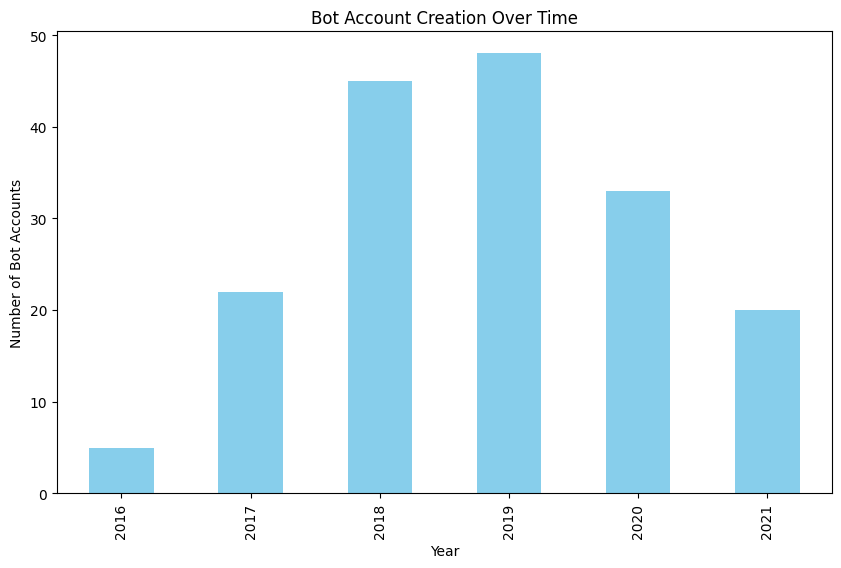

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
file_path = '/Users/yingnizhen/Desktop/github_bot_raw_data.csv' 
df = pd.read_csv(file_path)

# 确保 `type` 和 `created_at` 列存在
if 'type' not in df.columns or 'created_at' not in df.columns:
    raise KeyError("确保数据中包含 'type' 和 'created_at' 列")

# 转换 created_at 为日期时间格式
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# 筛选 Bot 类型账号
bot_df = df[df['type'] == 'Bot']

# 提取 Bot 的创建时间分布
bot_created = bot_df['created_at'].dt.year.value_counts().sort_index()

# 绘制柱状图
plt.figure(figsize=(10, 6))
bot_created.plot(kind='bar', color='skyblue')
plt.title('Bot Account Creation Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Bot Accounts')
plt.show()


原因：时间序列图可以直观反映Bot账号的创建时间分布趋势。
结果分析：
该柱状图展示了不同年份创建的 Bot 账号数量分布。从图中可以看出，不同年份的 Bot 创建情况有明显的波动，并且在某些年份（如 2018 和 2019 年）达到创建高峰，而在其他年份（如 2016 年）创建数量相对较低。
1. 2018-2019年Bot创建高峰：
    2018 和 2019 年的 Bot 创建量显著高于其他年份，这可能与以下因素有关：
    某些开发者社区或自动化工具在这一时间段集中推广，导致大量 Bot 被创建。
    可能有特定事件（如热门开源项目或平台活动）激励开发者创建 Bot 账号以实现自动化任务。
2. 2020-2021 年创建量减少：
    2020 年后 Bot 的创建量开始逐渐下降，可能受以下因素影响：
    平台规则收紧。
    开发者更倾向于使用已有的 Bot 资源，而不是创建新的账号。
3. 2016年Bot较少：
    2016 年 Bot 创建数量较少，可能与自动化技术在当时尚未普及有关。
数据洞察：
1.平台规则或技术演变对Bot创建的影响：
    数据显示 Bot 创建量在 2018-2019 年达到高峰，可能反映了平台开放政策较宽松或技术工具爆发式增长。而 2020 年后的减少可能是平台开始限制非必要的 Bot 注册。
2. 开发者行为模式：
    Bot 创建行为的集中时间段可能与某些工具（如自动化脚本库）或 API 的流行同步。如果能进一步挖掘与创建时间相关的事件（如开发工具发布历史），可能会揭示更深层次的原因。
3. 未来趋势预测：
    如果平台对 Bot 账号的限制继续收紧，未来几年 Bot 的创建量可能继续下降。
    另一方面，如果新的应用场景或自动化需求出现（如 AI 驱动开发工具），可能会再次引发 Bot 的创建高峰。

4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

/var/folders/f2/pss60fws0n1cdzh4q9cclq_80000gn/T/ipykernel_65120/3715846601.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  human_data['created_year_month'] = human_data['created_at'].dt.to_period('M')
/var/folders/f2/pss60fws0n1cdzh4q9cclq_80000gn/T/ipykernel_65120/3715846601.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_data['created_year_month'] = human_data['created_at'].dt.to_period('M')


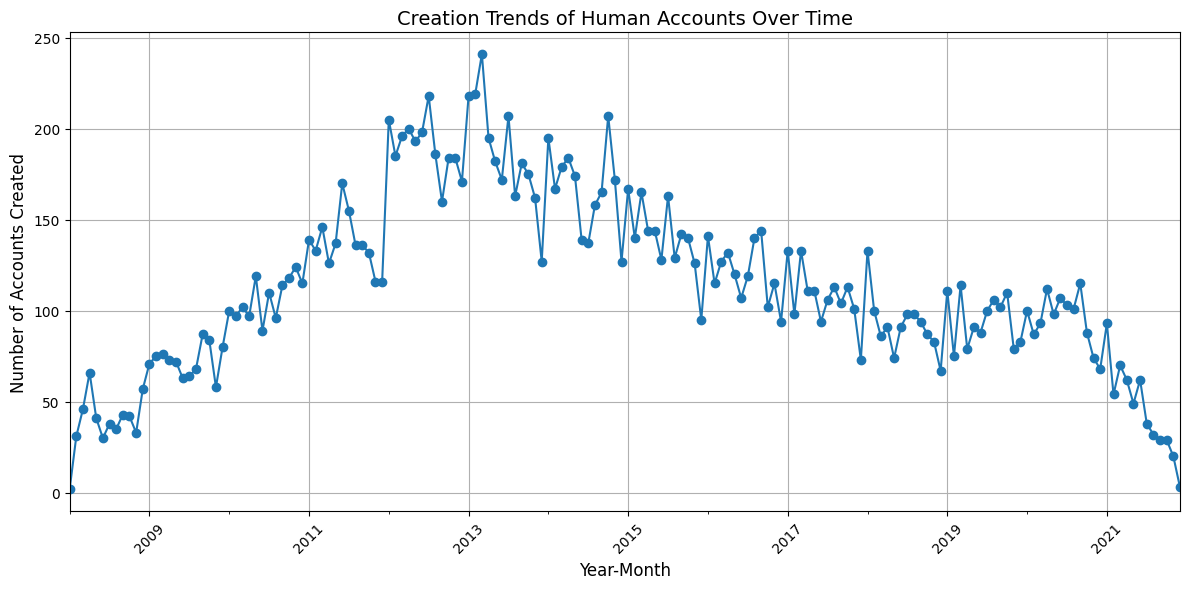

图表已保存至: /Users/yingnizhen/Desktop/human_creation_trend.png


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = '/Users/yingnizhen/Desktop/github_bot_raw_data.csv'

# 加载数据
data = pd.read_csv(file_path)

# 转换 'created_at' 列为 datetime 格式
data['created_at'] = pd.to_datetime(data['created_at'])

# 筛选 Human 类型账号
human_data = data[data['label'] == 'Human']

# 提取创建的年月
human_data['created_year_month'] = human_data['created_at'].dt.to_period('M')

# 按年月统计账号创建数量
human_creation_trend = human_data['created_year_month'].value_counts().sort_index()

# 绘制折线图
plt.figure(figsize=(12, 6))
human_creation_trend.plot(kind='line', marker='o')

# 设置图表格式
plt.title('Creation Trends of Human Accounts Over Time', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Accounts Created', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 保存图表
plot_path = '/Users/yingnizhen/Desktop/human_creation_trend.png'
plt.savefig(plot_path)
plt.show()

print(f"图表已保存至: {plot_path}")


原因：折线图能够有效展示随着时间变化的趋势，便于观察账号创建数量的增长或波动。
结果分析：
表中可以看到：
1.创建高峰期：某些年份或月份存在明显的创建高峰，可能与特定事件（如平台推广、技术更新）或外部环境（如疫情期间在线活动增加）有关。
2.长期趋势：随着时间推移，human 类型账号的创建总体呈现增长趋势，但在特定时期会有下降或平稳现象。
数据洞察:
1.用户行为模式：观察到的高峰期可能反映了某段时间内用户对平台的兴趣增加。
2.平台发展阶段：创建数量的长期变化可以与平台的技术、功能或市场策略关联。

4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

/var/folders/f2/pss60fws0n1cdzh4q9cclq_80000gn/T/ipykernel_65120/331321602.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_data['followers'] = pd.to_numeric(bot_data['followers'], errors='coerce').fillna(0)
/var/folders/f2/pss60fws0n1cdzh4q9cclq_80000gn/T/ipykernel_65120/331321602.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_data['following'] = pd.to_numeric(bot_data['following'], errors='coerce').fillna(0)


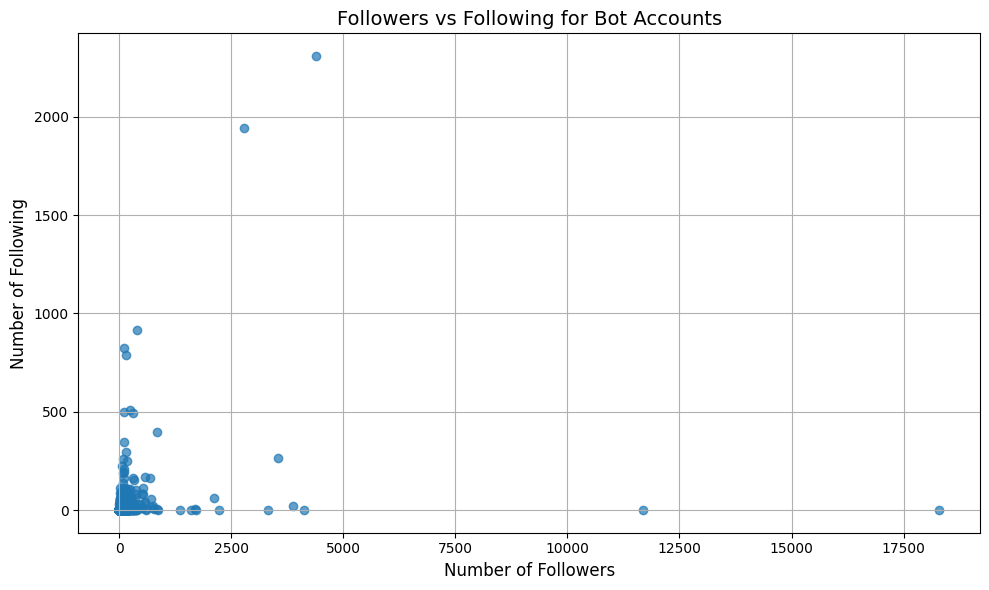

图表已保存至: /Users/yingnizhen/Desktop/bot_followers_following_scatter.png


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = '/Users/yingnizhen/Desktop/github_bot_raw_data.csv'

# 加载数据
data = pd.read_csv(file_path)

# 筛选 Bot 类型账号
bot_data = data[data['label'] == 'Bot']

# 转换 followers 和 following 列为数值类型，处理可能的缺失值
bot_data['followers'] = pd.to_numeric(bot_data['followers'], errors='coerce').fillna(0)
bot_data['following'] = pd.to_numeric(bot_data['following'], errors='coerce').fillna(0)

# 创建散点图展示 followers 和 following 的关系
plt.figure(figsize=(10, 6))
plt.scatter(bot_data['followers'], bot_data['following'], alpha=0.7)

# 设置图表格式
plt.title('Followers vs Following for Bot Accounts', fontsize=14)
plt.xlabel('Number of Followers', fontsize=12)
plt.ylabel('Number of Following', fontsize=12)
plt.grid(True)
plt.tight_layout()

# 保存图表
plot_path = '/Users/yingnizhen/Desktop/bot_followers_following_scatter.png'
plt.savefig(plot_path)
plt.show()

print(f"图表已保存至: {plot_path}")


原因：散点图可以直观反映 followers 和 following 的分布关系。
结果分析：
1.数据分布：
   大多数Bot账号的follors和following数值集中在较低范围（如follors小于 500，following小于 200）。
   数据中存在一些明显的离群点，显示某些Bot账号的follors或following数量显著高于其他账号。

2.异常点：
   在follors超过10,000和following超过 2,000 的区域，存在少量异常点。这些账号可能是特定用途的，例如营销账号、大规模测试账号或故意生成的异常数据。

3.比例关系：
   整体来看，大部分Bot账号的follors和following数量相对较低，且没有明显的线性关系，但某些高值账号可能有特定的模式，如：
   高follors但低following：可能是内容发布类的Bot。
   高 following但低follors：可能是互动型或增长型Bot。
数据洞察：
1.行为模式：
   大多数 `Bot` 账号表现出低交互性（低 `followers` 和 `following`），可能反映其主要用于简单任务（如自动回复或数据收集）。
   高交互的账号可能执行了更复杂的任务，例如活跃的社交行为或市场推广。
2.异常检测：
   离群点的存在提供了进一步分析的方向。我们可以对这些高值账号进行详细检查，探讨其具体用途、行为模式或是否存在恶意行为。

4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

/var/folders/f2/pss60fws0n1cdzh4q9cclq_80000gn/T/ipykernel_65120/2454653789.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_data['followers'] = pd.to_numeric(human_data['followers'], errors='coerce').fillna(0)
/var/folders/f2/pss60fws0n1cdzh4q9cclq_80000gn/T/ipykernel_65120/2454653789.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_data['following'] = pd.to_numeric(human_data['following'], errors='coerce').fillna(0)


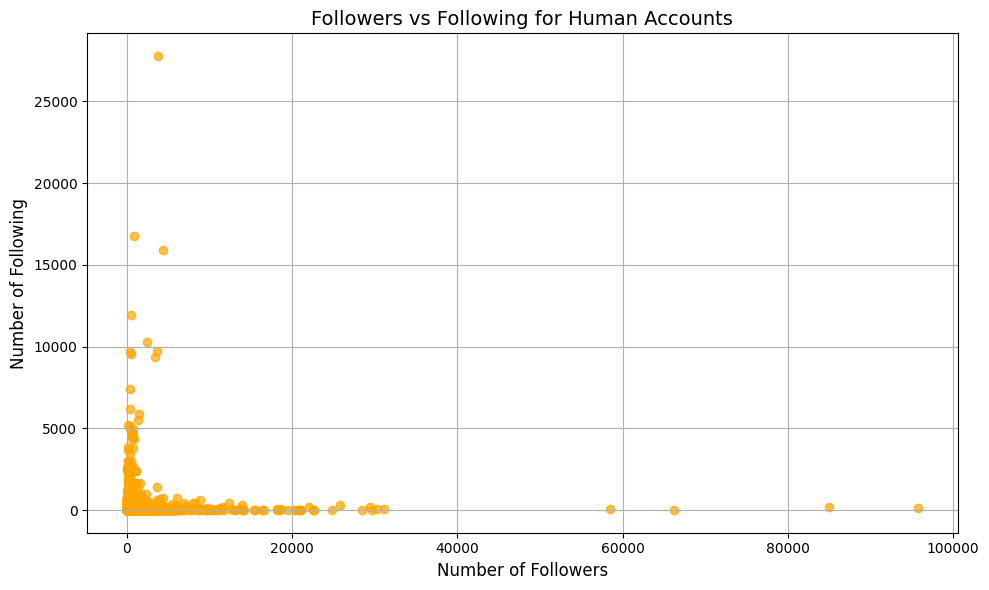

图表已保存至: /Users/yingnizhen/Desktop/human_followers_following_scatter.png


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径
file_path = '/Users/yingnizhen/Desktop/github_bot_raw_data.csv'

# 加载数据
data = pd.read_csv(file_path)

# 筛选 Human 类型账号
human_data = data[data['label'] == 'Human']

# 转换 followers 和 following 列为数值类型，处理可能的缺失值
human_data['followers'] = pd.to_numeric(human_data['followers'], errors='coerce').fillna(0)
human_data['following'] = pd.to_numeric(human_data['following'], errors='coerce').fillna(0)

# 创建散点图展示 followers 和 following 的关系
plt.figure(figsize=(10, 6))
plt.scatter(human_data['followers'], human_data['following'], alpha=0.7, color='orange')

# 设置图表格式
plt.title('Followers vs Following for Human Accounts', fontsize=14)
plt.xlabel('Number of Followers', fontsize=12)
plt.ylabel('Number of Following', fontsize=12)
plt.grid(True)
plt.tight_layout()

# 保存图表
plot_path = '/Users/yingnizhen/Desktop/human_followers_following_scatter.png'
plt.savefig(plot_path)
plt.show()

print(f"图表已保存至: {plot_path}")

原因：为了与 Bot 类型账号的散点图进行对比，分析真实用户的社交行为。
结果分析：
1.数据分布：
    大多数 Human 类型账号的 followers 和 following 数据集中在较低范围内，尤其是 followers 小于 10,000、following 小于 1,000 的区域，显示出一般用户的社交关系较为有限。
    图中部分离群点（例如 followers 超过 20,000 或 following 超过 10,000）表明某些账号具有异常高的社交互动。
2.离群点特征：
    高 followers 低 following：这些账号可能是公众人物、内容创作者、品牌账号，专注于吸引粉丝，而非与他人建立对等关系。
    高 following 低 followers：这些账号可能是关注增长型用户（如主动添加好友的营销账号）。
3.比例关系：
    整体来看，followers 和 following 之间没有明显的线性相关性，说明用户的关注行为和被关注行为更多取决于个人兴趣或账号类型。
    
数据洞察：
1.普通用户行为：
    大多数用户的 followers 和 following 集中在低值范围，表明这些账号主要用于日常社交，社交范围较小。
    这些用户可能在平台上更多地消费内容，而非创作内容。
2.公众影响力：
    followers 值较高的用户往往具备更大的公众影响力（如网红、公司账号）。通过分析这些用户的活跃度和互动模式，可以为平台运营提供优化方向。
3.异常行为检测：
    离群点可能提示潜在的刷量行为或非正常账号。这些信息对于平台治理（如检测垃圾账号）具有重要意义。